# Data Preprocessing and Cleaning
# Contents
* [Import libraries](#Import-libraries)
* [Import dataset](#Import-dataset)
* [Missing Data](#Missing-Data)
* [Change data types](#Change-data-types)
* [Renaming columns](#Renaming-columns) 
* [Normalization](#Normalization)
* [Outliers Removal](#Outliers-Removal)
* [One Hot Encoding](#One-Hot-Encoding)
* [Cleansed Datasets](#Cleansed-Datasets)

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [3]:
# To show all columns in dataframes
pd.set_option('display.max_columns', None)

**[Back to Content](#Contents)**

# Import dataset

In [4]:
df = pd.read_csv('CTG_dataset.csv')

**[Back to Content](#Contents)**

# Dataset Exploration

In [5]:
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,35400,CTG0001.txt,240,357,120,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,0,0,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,35188,CTG0002.txt,5,632,132,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,0,0,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,35188,CTG0003.txt,177,779,133,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,0,0,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,35188,CTG0004.txt,411,1192,134,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,1,0,0,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,35188,CTG0005.txt,533,1147,132,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,1,0,1,0,0,0,0,0,0,0,0,2,1


In [6]:
df.describe()

,Date,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,35177.707902,878.439793,1702.877234,133.303857,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,8.187629,1.570085,0.003293,0.126058,0.0,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,0.180621,0.272342,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
std,1038.632386,894.084748,930.919143,9.840844,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,5.628247,2.499229,0.057300,0.464361,0.0,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.384794,0.445270,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027,3.026883,0.614377
min,29224.000000,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,35187.000000,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,4.600000,0.000000,0.000000,0.000000,0.0,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,35298.000000,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,7.400000,0.000000,0.000000,0.000000,0.0,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,35509.000000,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,10.800000,3.000000,0.000000,0.000000,0.0,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,35952.000000,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,50.700000,16.000000,1.000000,4.000000,0.0,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


**[Back to Content](#Contents)**

# Missing Data 

In [7]:
df.isnull().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

**[Back to Content](#Contents)**

# Change data types

In [8]:
# View data types of each variable
df.dtypes

FileName     object
Date          int64
SegFile      object
b             int64
e             int64
LBE           int64
LB            int64
AC            int64
FM            int64
UC            int64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
DL            int64
DS            int64
DP            int64
DR            int64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
A             int64
B             int64
C             int64
D             int64
E             int64
AD            int64
DE            int64
LD            int64
FS            int64
SUSP          int64
CLASS         int64
NSP           int64
dtype: object


## View the number of categories for each categorical variable

In [9]:
for label, content in df.iloc[:,27:].items():
    values = list(df[label].unique())
    print(label)
    print(values)

Tendency
[1, 0, -1]
A
[0, 1]
B
[0, 1]
C
[0, 1]
D
[0, 1]
E
[0, 1]
AD
[0, 1]
DE
[0, 1]
LD
[0, 1]
FS
[1, 0]
SUSP
[0, 1]
CLASS
[9, 6, 2, 8, 10, 7, 1, 3, 5, 4]
NSP
[2, 1, 3]


## Transformed the wrongly identified categorical variable to 'category' data type 

In [10]:

toCategoryCols = ["Tendency","A", "B", "C", "D", "E", "AD", "DE", "LD", "FS", "SUSP", "CLASS", "NSP"]

df[toCategoryCols] = df[toCategoryCols].astype('category')




## Check whether the data types have been changed

In [11]:
df.dtypes

FileName      object
Date           int64
SegFile       object
b              int64
e              int64
LBE            int64
LB             int64
AC             int64
FM             int64
UC             int64
ASTV           int64
MSTV         float64
ALTV           int64
MLTV         float64
DL             int64
DS             int64
DP             int64
DR             int64
Width          int64
Min            int64
Max            int64
Nmax           int64
Nzeros         int64
Mode           int64
Mean           int64
Median         int64
Variance       int64
Tendency    category
A           category
B           category
C           category
D           category
E           category
AD          category
DE          category
LD          category
FS          category
SUSP        category
CLASS       category
NSP         category
dtype: object

**[Back to Content](#Contents)**

# Renaming columns

In [12]:
df_rename = df.rename(columns = {'b':'start_instant',
                                 'e':'end_instant',
                                 'LBE':'baseline_value_med_expert',
                                 'LB':'baseline_value_SisPorto',
                                 'AC':'Accelerations_SisPorto',
                                 'FM':'Foetal_Movement_SisPorto',
                                 'UC':'uterine_contractions_SisPorto',
                                 'ASTV':'time_with_abnormal_ST_variability_pct_SisPorto',
                                 'MSTV':'ST_variability_mean_SisPorto',
                                 'ALTV':'time_with_abnormal_LT_variability_pct_SisPorto',
                                 'MLTV':'LT_variability_mean_SisPorto',
                                 'DL':'light_decelerations',
                                 'DS':'severe_decelerations',
                                 'DP':'proloungued_decelerations',
                                 'DR':'repetitive_decelerations',
                                 'Width':'hist_width',
                                 'Min':'hist_min',
                                 'Max':'hist_max',
                                 'Nmax':'hist_peaks_count',
                                 'Nzeros':'hist_zero_count',
                                 'Mode':'hist_mode',
                                 'Mean':'hist_mean',
                                 'Median':'hist_median',
                                 'Variance':'hist_variance',
                                 'Tendency':'hist_tendency',
                                 'A':'calm_sleep',
                                 'B':'REM_sleep',
                                 'C':'calm_vigilance',
                                 'D':'active_vigilance',
                                 'E':'shift_pattern',
                                 'AD':'accelerative_decelerative_pattern_stress_situation',
                                 'DE':'decelerative_pattern_vagal_stimulation',
                                 'LD':'large_decelerative_pattern',
                                 'FS':'flat_sinusoidal_pattern_pathological_state',
                                 'SUSP':'suspect_pattern',
                                 'CLASS':'class_code',
                                 'NSP':'target_label'
                                })

## Show all renamed columns

In [13]:
for col in df_rename.columns:
    print(col)

FileName
Date
SegFile
start_instant
end_instant
baseline_value_med_expert
baseline_value_SisPorto
Accelerations_SisPorto
Foetal_Movement_SisPorto
uterine_contractions_SisPorto
time_with_abnormal_ST_variability_pct_SisPorto
ST_variability_mean_SisPorto
time_with_abnormal_LT_variability_pct_SisPorto
LT_variability_mean_SisPorto
light_decelerations
severe_decelerations
proloungued_decelerations
repetitive_decelerations
hist_width
hist_min
hist_max
hist_peaks_count
hist_zero_count
hist_mode
hist_mean
hist_median
hist_variance
hist_tendency
calm_sleep
REM_sleep
calm_vigilance
active_vigilance
shift_pattern
accelerative_decelerative_pattern_stress_situation
decelerative_pattern_vagal_stimulation
large_decelerative_pattern
flat_sinusoidal_pattern_pathological_state
suspect_pattern
class_code
target_label


**[Back to Content](#Contents)**

# Normalization

**To transform the numerical variable in the range of 0-1 to ensure there's no biasness when training the model**

In [14]:


# Create a subset of data with features (numerical) that need to be normalized 

featuresToNormalize = df_rename.loc[:,['baseline_value_med_expert',
                                         'baseline_value_SisPorto',
                                         'Accelerations_SisPorto',
                                         'Foetal_Movement_SisPorto',
                                         'uterine_contractions_SisPorto',
                                         'time_with_abnormal_ST_variability_pct_SisPorto',
                                         'ST_variability_mean_SisPorto',
                                         'time_with_abnormal_LT_variability_pct_SisPorto',
                                         'LT_variability_mean_SisPorto',
                                         'light_decelerations',
                                         'severe_decelerations',
                                         'proloungued_decelerations',
                                         'repetitive_decelerations',
                                         'hist_width',
                                         'hist_min',
                                         'hist_max',
                                         'hist_peaks_count',
                                         'hist_zero_count',
                                         'hist_mode',
                                         'hist_mean',
                                         'hist_median',
                                         'hist_variance']]






featuresToNormalize.columns = [
                                 'baseline_value_med_expert_normalized',
                                 'baseline_value_SisPorto_normalized',
                                 'Accelerations_SisPorto_normalized',
                                 'Foetal_Movement_SisPorto_normalized',
                                 'uterine_contractions_SisPorto_normalized',
                                 'time_with_abnormal_ST_variability_pct_SisPorto_normalized',
                                 'ST_variability_mean_SisPorto_normalized',
                                 'time_with_abnormal_LT_variability_pct_SisPorto_normalized',
                                 'LT_variability_mean_SisPorto_normalized',
                                 'light_decelerations_normalized',
                                 'severe_decelerations_normalized',
                                 'proloungued_decelerations_normalized',
                                 'repetitive_decelerations_normalized',
                                 'hist_width_normalized',
                                 'hist_min_normalized',
                                 'hist_max_normalized',
                                 'hist_peaks_count_normalized',
                                 'hist_zero_count_normalized',
                                 'hist_mode_normalized',
                                 'hist_mean_normalized',
                                 'hist_median_normalized',
                                 'hist_variance_normalized'
                              ]





# Normalizing The Column
# Creating a minimum and maximum processor object
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))



# column name
names = featuresToNormalize.columns



d = scaler.fit_transform(featuresToNormalize)
features_normalize_post = pd.DataFrame(d, columns=names)





In [15]:
# to double check if they have been normalized in 0 - 1 range
display(featuresToNormalize.describe())
display(features_normalize_post.describe())

,baseline_value_med_expert_normalized,baseline_value_SisPorto_normalized,Accelerations_SisPorto_normalized,Foetal_Movement_SisPorto_normalized,uterine_contractions_SisPorto_normalized,time_with_abnormal_ST_variability_pct_SisPorto_normalized,ST_variability_mean_SisPorto_normalized,time_with_abnormal_LT_variability_pct_SisPorto_normalized,LT_variability_mean_SisPorto_normalized,light_decelerations_normalized,severe_decelerations_normalized,proloungued_decelerations_normalized,repetitive_decelerations_normalized,hist_width_normalized,hist_min_normalized,hist_max_normalized,hist_peaks_count_normalized,hist_zero_count_normalized,hist_mode_normalized,hist_mean_normalized,hist_median_normalized,hist_variance_normalized
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,8.187629,1.570085,0.003293,0.126058,0.0,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090
std,9.840844,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,5.628247,2.499229,0.057300,0.464361,0.0,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636
min,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000
25%,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,4.600000,0.000000,0.000000,0.000000,0.0,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000
50%,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,7.400000,0.000000,0.000000,0.000000,0.0,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000
75%,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,10.800000,3.000000,0.000000,0.000000,0.0,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000
max,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,50.700000,16.000000,1.000000,4.000000,0.0,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000


,baseline_value_med_expert_normalized,baseline_value_SisPorto_normalized,Accelerations_SisPorto_normalized,Foetal_Movement_SisPorto_normalized,uterine_contractions_SisPorto_normalized,time_with_abnormal_ST_variability_pct_SisPorto_normalized,ST_variability_mean_SisPorto_normalized,time_with_abnormal_LT_variability_pct_SisPorto_normalized,LT_variability_mean_SisPorto_normalized,light_decelerations_normalized,severe_decelerations_normalized,proloungued_decelerations_normalized,repetitive_decelerations_normalized,hist_width_normalized,hist_min_normalized,hist_max_normalized,hist_peaks_count_normalized,hist_zero_count_normalized,hist_mode_normalized,hist_mean_normalized,hist_median_normalized,hist_variance_normalized
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,0.505627,0.505627,0.104711,0.012839,0.159127,0.466535,0.166586,0.108205,0.161492,0.098130,0.003293,0.031515,0.0,0.381050,0.399812,0.362288,0.226011,0.032361,0.609858,0.565234,0.560462,0.069919
std,0.182238,0.182238,0.136956,0.065825,0.123787,0.229238,0.129888,0.202164,0.111011,0.156202,0.057300,0.116090,0.0,0.220089,0.271195,0.154691,0.163855,0.070606,0.128987,0.143061,0.132721,0.107724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370370,0.370370,0.000000,0.000000,0.043478,0.266667,0.073529,0.000000,0.090730,0.000000,0.000000,0.000000,0.0,0.192090,0.155963,0.258621,0.111111,0.000000,0.543307,0.477064,0.477064,0.007435
50%,0.500000,0.500000,0.038462,0.000000,0.130435,0.493333,0.147059,0.000000,0.145957,0.000000,0.000000,0.000000,0.0,0.364407,0.394495,0.344828,0.166667,0.000000,0.622047,0.577982,0.568807,0.026022
75%,0.629630,0.629630,0.153846,0.003546,0.217391,0.653333,0.220588,0.120879,0.213018,0.187500,0.000000,0.000000,0.0,0.548023,0.642202,0.448276,0.333333,0.000000,0.692913,0.660550,0.651376,0.089219
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# join back the normalized data back to the data frame


#inner join on index
df_w_normalized = pd.merge(df_rename, features_normalize_post, left_index=True, right_index=True)

df_w_normalized.head()

,FileName,Date,SegFile,start_instant,end_instant,baseline_value_med_expert,baseline_value_SisPorto,Accelerations_SisPorto,Foetal_Movement_SisPorto,uterine_contractions_SisPorto,time_with_abnormal_ST_variability_pct_SisPorto,ST_variability_mean_SisPorto,time_with_abnormal_LT_variability_pct_SisPorto,LT_variability_mean_SisPorto,light_decelerations,severe_decelerations,proloungued_decelerations,repetitive_decelerations,hist_width,hist_min,hist_max,hist_peaks_count,hist_zero_count,hist_mode,hist_mean,hist_median,hist_variance,hist_tendency,calm_sleep,REM_sleep,calm_vigilance,active_vigilance,shift_pattern,accelerative_decelerative_pattern_stress_situation,decelerative_pattern_vagal_stimulation,large_decelerative_pattern,flat_sinusoidal_pattern_pathological_state,suspect_pattern,class_code,target_label,baseline_value_med_expert_normalized,baseline_value_SisPorto_normalized,Accelerations_SisPorto_normalized,Foetal_Movement_SisPorto_normalized,uterine_contractions_SisPorto_normalized,time_with_abnormal_ST_variability_pct_SisPorto_normalized,ST_variability_mean_SisPorto_normalized,time_with_abnormal_LT_variability_pct_SisPorto_normalized,LT_variability_mean_SisPorto_normalized,light_decelerations_normalized,severe_decelerations_normalized,proloungued_decelerations_normalized,repetitive_decelerations_normalized,hist_width_normalized,hist_min_normalized,hist_max_normalized,hist_peaks_count_normalized,hist_zero_count_normalized,hist_mode_normalized,hist_mean_normalized,hist_median_normalized,hist_variance_normalized
0,Variab10.txt,35400,CTG0001.txt,240,357,120,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,0,0,0,0,0,0,0,0,1,0,9,2,0.259259,0.259259,0.000000,0.0,0.000000,0.813333,0.044118,0.472527,0.047337,0.000,0.0,0.0,0.0,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375
1,Fmcs_1.txt,35188,CTG0002.txt,5,632,132,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,0,0,0,0,0,1,0,0,0,0,6,1,0.481481,0.481481,0.153846,0.0,0.173913,0.066667,0.279412,0.000000,0.205128,0.125,0.0,0.0,0.0,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610
2,Fmcs_1.txt,35188,CTG0003.txt,177,779,133,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,0,0,0,0,0,1,0,0,0,0,6,1,0.500000,0.500000,0.076923,0.0,0.217391,0.053333,0.279412,0.000000,0.264300,0.125,0.0,0.0,0.0,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327
3,Fmcs_1.txt,35188,CTG0004.txt,411,1192,134,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,1,0,0,0,0,0,1,0,0,0,0,6,1,0.518519,0.518519,0.076923,0.0,0.260870,0.053333,0.323529,0.000000,0.453649,0.125,0.0,0.0,0.0,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327
4,Fmcs_1.txt,35188,CTG0005.txt,533,1147,132,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,1,0,1,0,0,0,0,0,0,0,0,2,1,0.481481,0.481481,0.153846,0.0,0.217391,0.053333,0.323529,0.000000,0.392505,0.000,0.0,0.0,0.0,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892


**[Back to Content](#Contents)**

# Outliers Removal

**There are no difference in using normalized and unnormalized numerical data for outlier removal. In this study, the outliers removal wil be based on the normalized data**

In [17]:
# iterating the columns
for col in df_w_normalized.columns:
    print(col)

FileName
Date
SegFile
start_instant
end_instant
baseline_value_med_expert
baseline_value_SisPorto
Accelerations_SisPorto
Foetal_Movement_SisPorto
uterine_contractions_SisPorto
time_with_abnormal_ST_variability_pct_SisPorto
ST_variability_mean_SisPorto
time_with_abnormal_LT_variability_pct_SisPorto
LT_variability_mean_SisPorto
light_decelerations
severe_decelerations
proloungued_decelerations
repetitive_decelerations
hist_width
hist_min
hist_max
hist_peaks_count
hist_zero_count
hist_mode
hist_mean
hist_median
hist_variance
hist_tendency
calm_sleep
REM_sleep
calm_vigilance
active_vigilance
shift_pattern
accelerative_decelerative_pattern_stress_situation
decelerative_pattern_vagal_stimulation
large_decelerative_pattern
flat_sinusoidal_pattern_pathological_state
suspect_pattern
class_code
target_label
baseline_value_med_expert_normalized
baseline_value_SisPorto_normalized
Accelerations_SisPorto_normalized
Foetal_Movement_SisPorto_normalized
uterine_contractions_SisPorto_normalized
time_wit

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


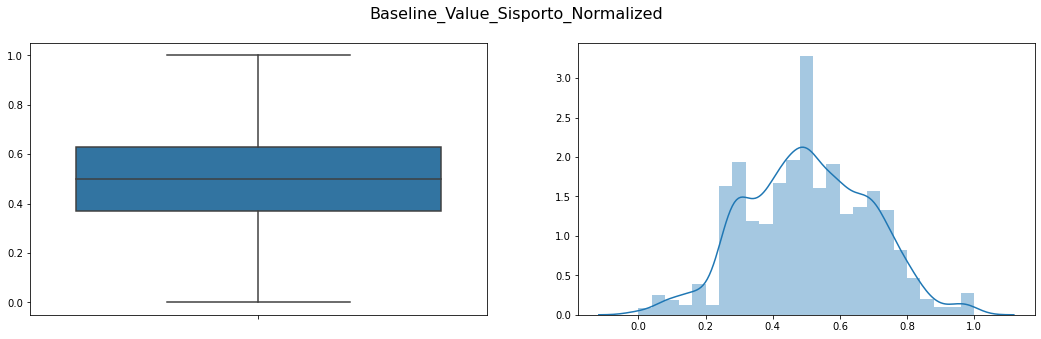

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


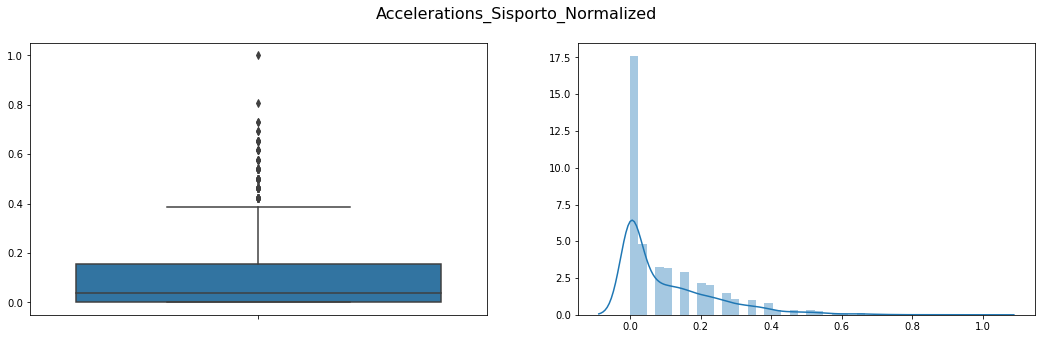

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


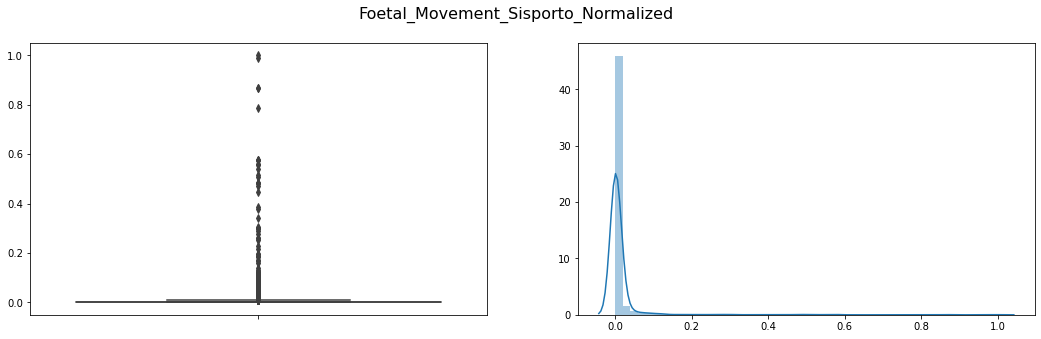

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


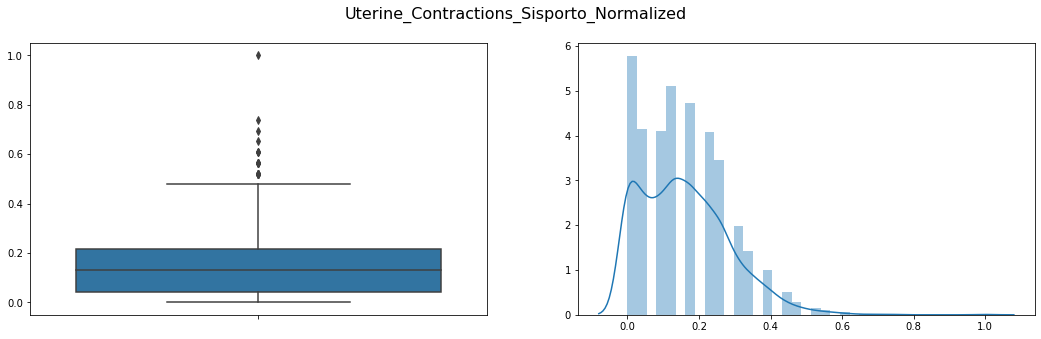

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


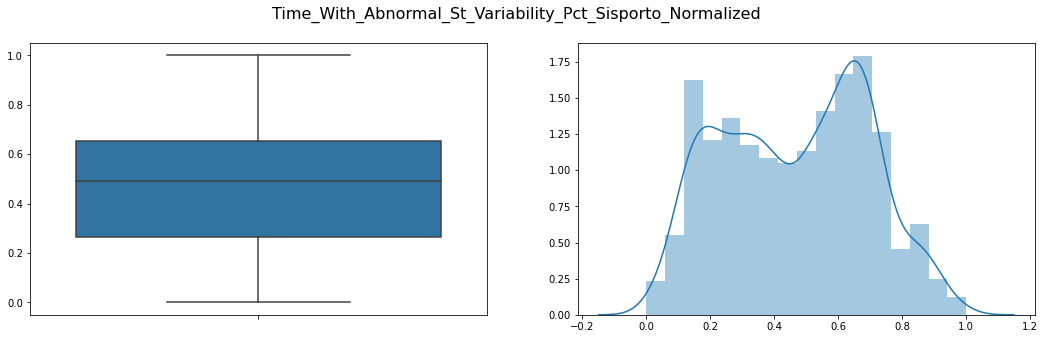

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


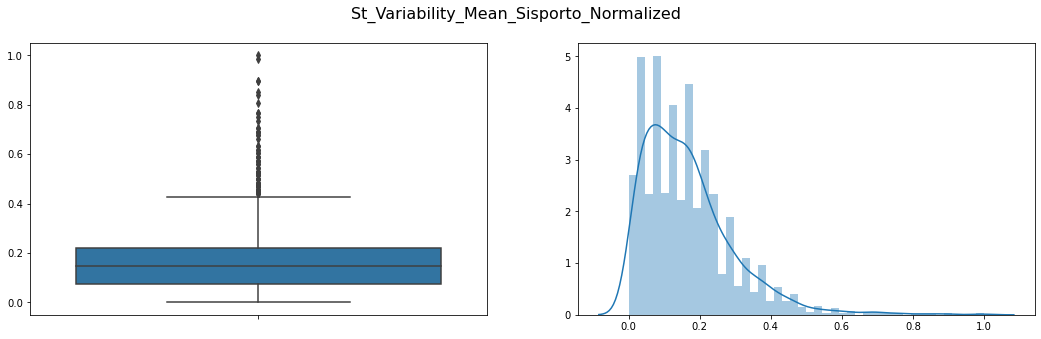

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


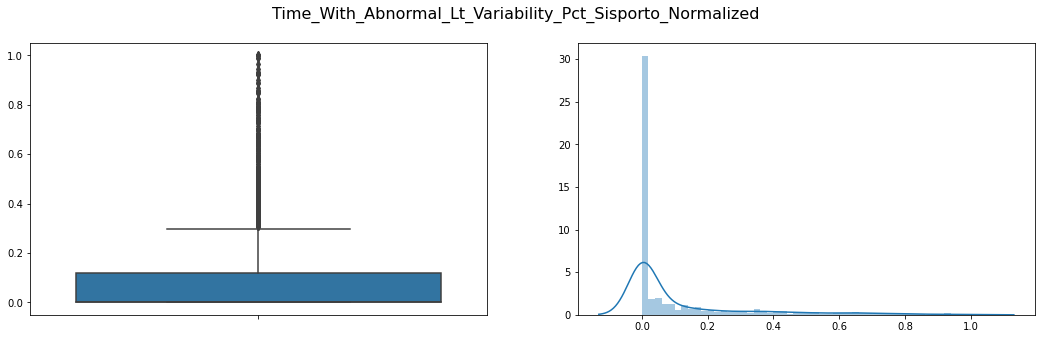

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


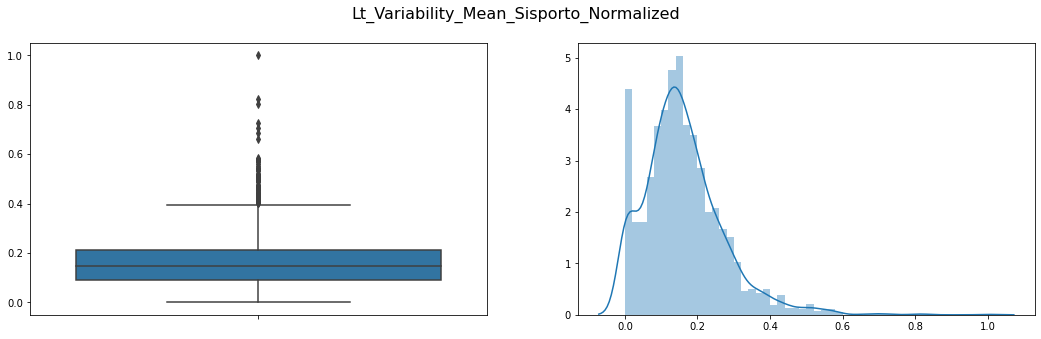

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


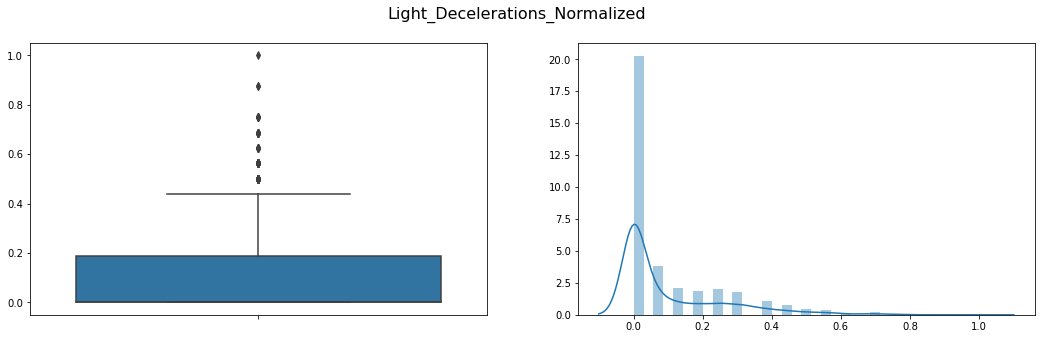

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


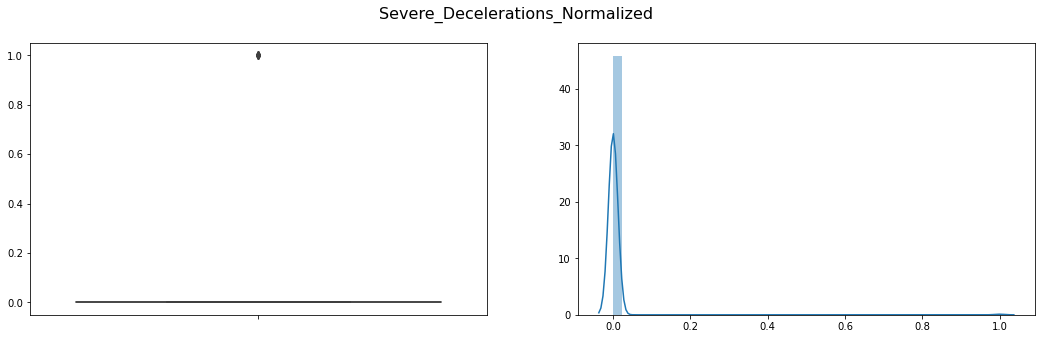

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


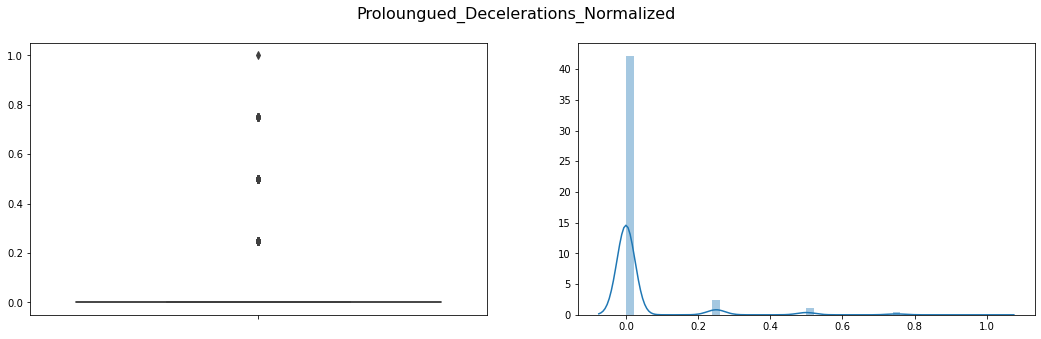

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


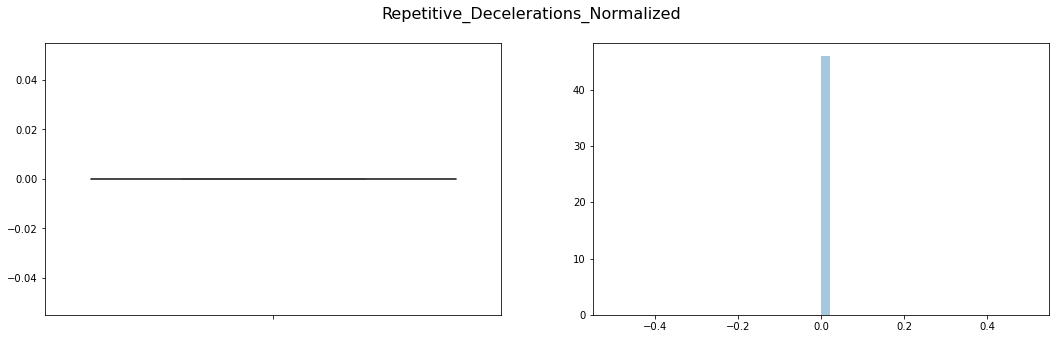

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


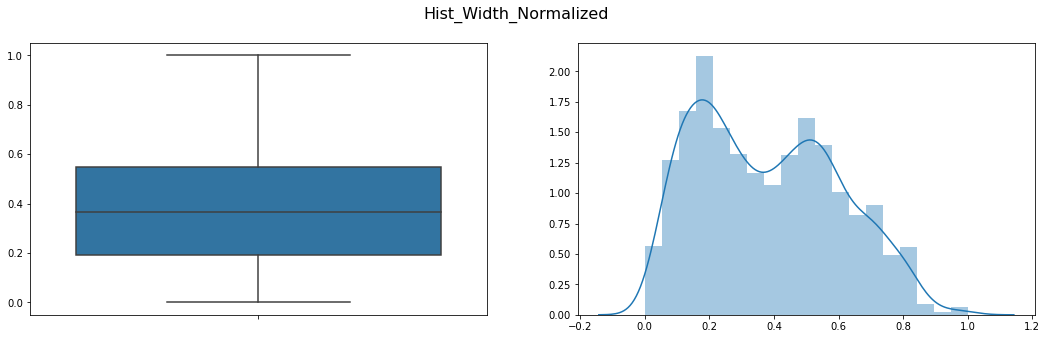

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


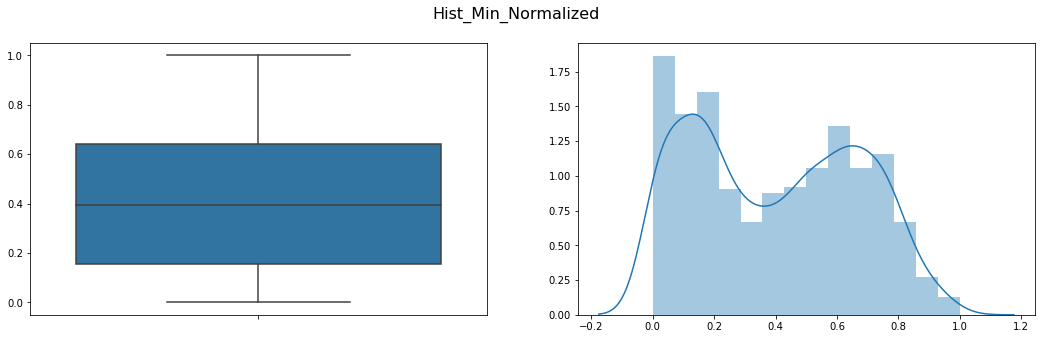

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


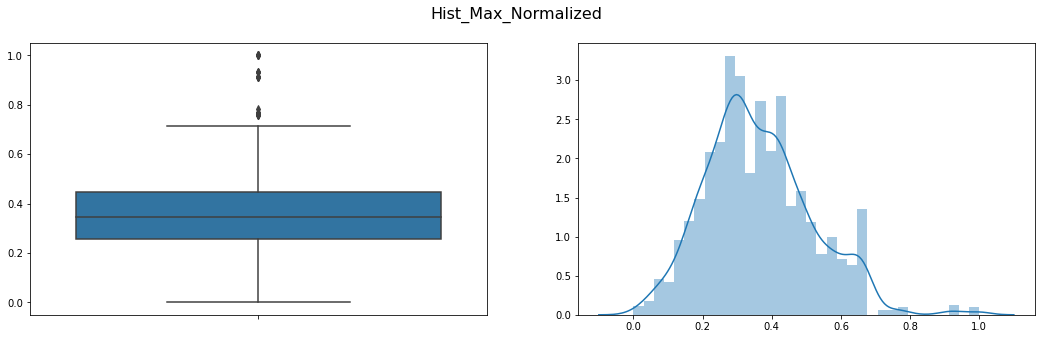

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


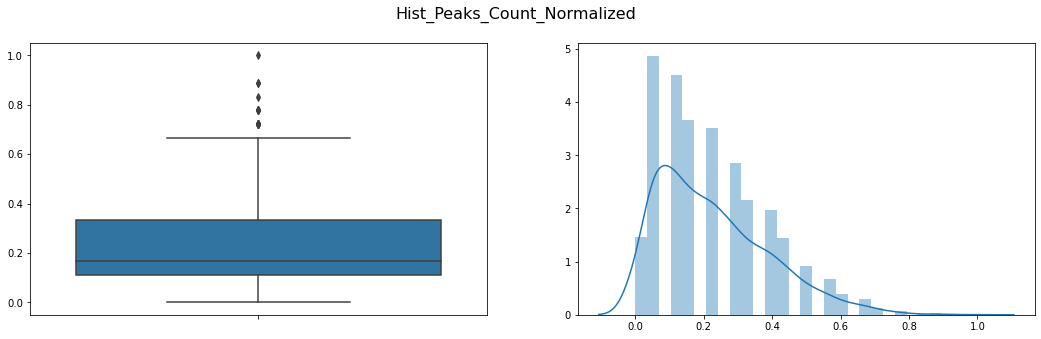

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


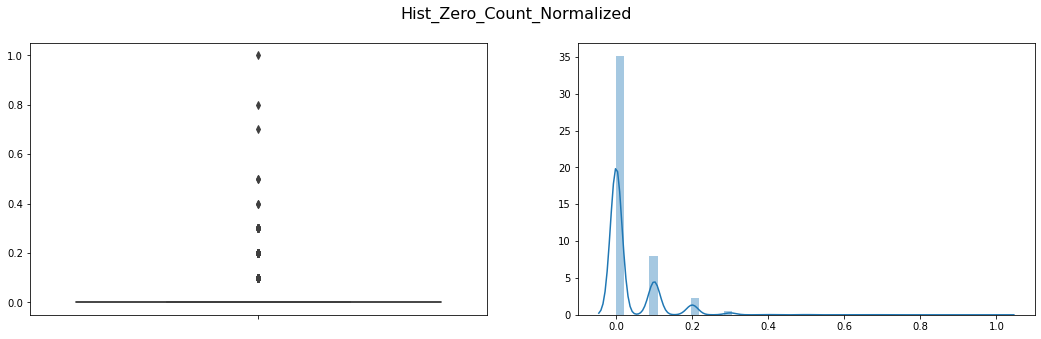

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


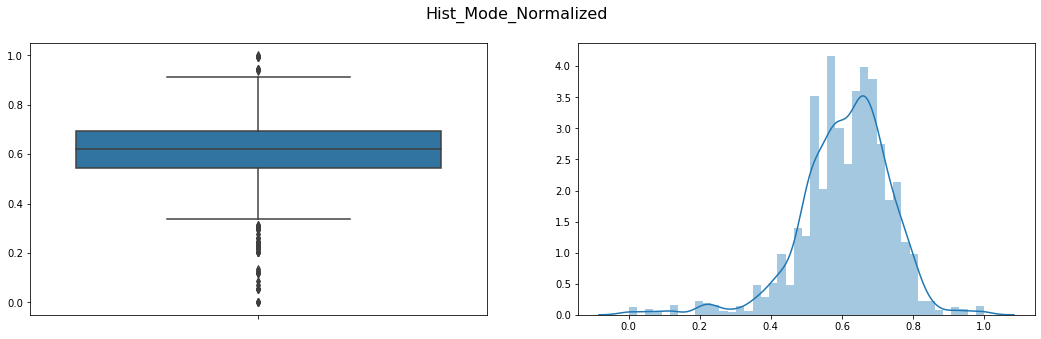

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


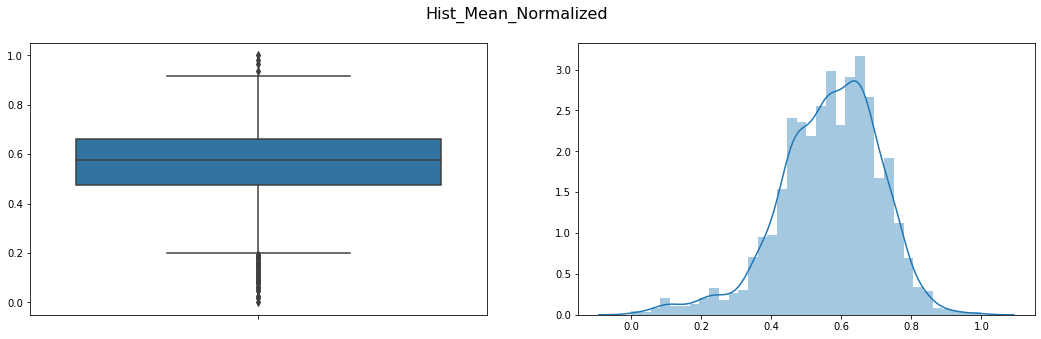

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


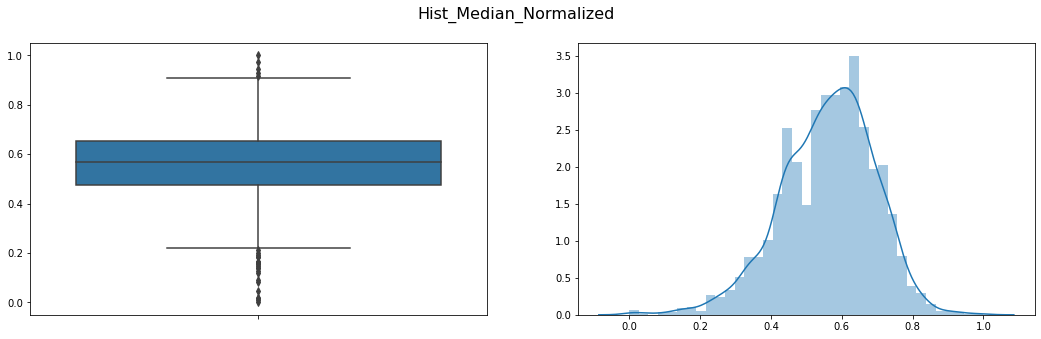

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


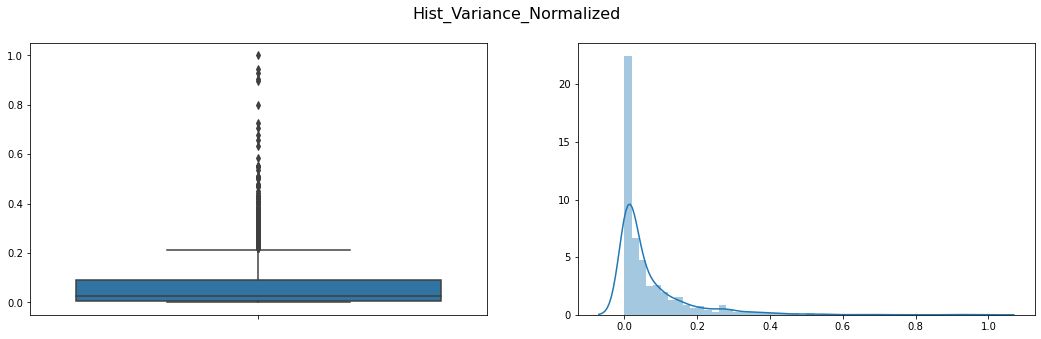

In [18]:
for column in df_w_normalized.iloc[:,41:]:

    fig, axs = plt.subplots(1, 2, figsize=(18, 5))

    # set title and change size
    fig.suptitle(column.title(), size = 16)

    # boxplot
    plt.subplot(1,2,1)
    axs = sns.boxplot(y = column, data = df_w_normalized)
    # hide y-axis label
    axs.yaxis.label.set_visible(False)

    # histogram
    plt.subplot(1,2,2)
    axs = sns.distplot(df_w_normalized[column])
    # hide axis label
    axs.xaxis.label.set_visible(False)
    axs.yaxis.label.set_visible(False)
    plt.show()
    print("")

- As seen from the boxplots above, there are many outliers seen in some of the features like ST_variability_mean_SisPorto_normalize, Foetal_Movement_Sisporto_Normalized, etc. However, removing them from this small dataset would cause more information loss. Therefore, outliers removal will not be performed.

- The outliers removal code will be included below for references purpose. To remove outliers, we take a feature as the reference base to decide which data points / instances are outliers.

##### References:
##### https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/


In [19]:
# 'uterine_contractions_SisPorto_normalized' was used as the reference variable,
# as seen from the boxplot above, features > 0.5 are outliers and shall be removed
# the code below shows the index of each outliers. 

print(np.where(df_w_normalized['uterine_contractions_SisPorto_normalized']>0.5))



(array([ 561,  792,  793,  794, 1077, 1290, 1631, 1632, 1647, 1679, 1680,
       1732, 1824, 1934, 1955, 1956, 1957, 1958, 1962, 1963, 2065, 2086],
      dtype=int64),)


In [20]:
# the code below shows the outliers
df_w_normalized[df_w_normalized['uterine_contractions_SisPorto_normalized']>0.5]

,FileName,Date,SegFile,start_instant,end_instant,baseline_value_med_expert,baseline_value_SisPorto,Accelerations_SisPorto,Foetal_Movement_SisPorto,uterine_contractions_SisPorto,time_with_abnormal_ST_variability_pct_SisPorto,ST_variability_mean_SisPorto,time_with_abnormal_LT_variability_pct_SisPorto,LT_variability_mean_SisPorto,light_decelerations,severe_decelerations,proloungued_decelerations,repetitive_decelerations,hist_width,hist_min,hist_max,hist_peaks_count,hist_zero_count,hist_mode,hist_mean,hist_median,hist_variance,hist_tendency,calm_sleep,REM_sleep,calm_vigilance,active_vigilance,shift_pattern,accelerative_decelerative_pattern_stress_situation,decelerative_pattern_vagal_stimulation,large_decelerative_pattern,flat_sinusoidal_pattern_pathological_state,suspect_pattern,class_code,target_label,baseline_value_med_expert_normalized,baseline_value_SisPorto_normalized,Accelerations_SisPorto_normalized,Foetal_Movement_SisPorto_normalized,uterine_contractions_SisPorto_normalized,time_with_abnormal_ST_variability_pct_SisPorto_normalized,ST_variability_mean_SisPorto_normalized,time_with_abnormal_LT_variability_pct_SisPorto_normalized,LT_variability_mean_SisPorto_normalized,light_decelerations_normalized,severe_decelerations_normalized,proloungued_decelerations_normalized,repetitive_decelerations_normalized,hist_width_normalized,hist_min_normalized,hist_max_normalized,hist_peaks_count_normalized,hist_zero_count_normalized,hist_mode_normalized,hist_mean_normalized,hist_median_normalized,hist_variance_normalized
561,Pcmo_7.txt,34752,CTG0562.txt,0,1199,128,128,1,0,12,37,2.8,0,16.0,3,0,0,0,136,55,191,9,1,129,130,129,37,0,0,0,0,0,0,1,0,0,0,0,6,1,0.407407,0.407407,0.038462,0.000000,0.521739,0.333333,0.382353,0.000000,0.315582,0.1875,0.0,0.00,0.0,0.751412,0.045872,0.594828,0.500000,0.1,0.543307,0.522936,0.477064,0.137546
792,S0001010.dat,35262,CTG0793.txt,0,3599,146,146,1,0,17,55,0.7,32,8.2,5,0,0,0,72,93,165,4,0,150,147,150,6,1,1,0,0,0,0,0,0,0,0,0,1,1,0.740741,0.740741,0.038462,0.000000,0.739130,0.573333,0.073529,0.351648,0.161736,0.3125,0.0,0.00,0.0,0.389831,0.394495,0.370690,0.222222,0.0,0.708661,0.678899,0.669725,0.022305
793,S0001010.dat,35262,CTG0794.txt,1022,3599,146,146,1,0,13,52,0.8,32,8.6,5,0,0,0,72,93,165,3,0,152,147,151,9,1,1,0,0,0,0,0,0,0,0,0,1,1,0.740741,0.740741,0.038462,0.000000,0.565217,0.533333,0.088235,0.351648,0.169625,0.3125,0.0,0.00,0.0,0.389831,0.394495,0.370690,0.166667,0.0,0.724409,0.678899,0.678899,0.033457
794,S0001010.dat,35262,CTG0795.txt,1473,3599,146,146,1,0,12,49,0.9,32,8.7,5,0,0,0,80,86,166,3,0,152,147,151,11,1,1,0,0,0,0,0,0,0,0,0,1,1,0.740741,0.740741,0.038462,0.000000,0.521739,0.493333,0.102941,0.351648,0.171598,0.3125,0.0,0.00,0.0,0.435028,0.330275,0.379310,0.166667,0.0,0.724409,0.678899,0.678899,0.040892
1077,S0001037.dat,35298,CTG1078.txt,1386,2599,134,134,3,0,12,26,1.8,10,15.1,6,0,0,0,82,82,164,5,0,147,133,137,40,1,0,0,0,0,0,1,0,0,0,0,6,1,0.518519,0.518519,0.115385,0.000000,0.521739,0.186667,0.235294,0.109890,0.297830,0.3750,0.0,0.00,0.0,0.446328,0.293578,0.362069,0.277778,0.0,0.685039,0.550459,0.550459,0.148699
1290,S0001058.dat,35333,CTG1292.txt,174,1559,115,115,4,0,13,21,1.7,0,10.7,2,0,0,0,83,85,168,2,0,129,122,125,19,0,0,0,0,0,0,1,0,0,0,0,6,1,0.166667,0.166667,0.153846,0.000000,0.565217,0.120000,0.220588,0.000000,0.211045,0.1250,0.0,0.00,0.0,0.451977,0.321101,0.396552,0.111111,0.0,0.543307,0.449541,0.440367,0.070632
1631,S7001010.dsp,35704,CTG1634.txt,6,1322,130,130,5,0,14,52,2.7,0,2.2,3,0,0,0,89,76,165,5,0,139,129,135,20,0,0,0,0,0,0,1,0,0,0,0,6,1,0.444444,0.444444,0.192308,0.000000,0.608696,0.533333,0.367647,0.000000,0.043393,0.1875,0.0,0.00,0.0,0.485876,0.238532,0.370690,0.277778,0.0,0.622047,0.513761,0.532110,0.074349
1632,S7001010.dsp,35704,CTG1635.txt,148,1861,130,130,4,2,15,52,2.7,0,4.6,2,0,0,0,88,77,165,6,0,139,130,136,15,0,0,0,0,0,0,1,0,0,0,0,6,1,0.444444,0.444444,0.153846,0.003546,0.652174,0.533333,0.367647,0.000000,0.090730,0.1250,0.0,0.00,0.0,0.480226,0.247706,0.370690,0.333333,0.0,0.6

In [21]:
#The code below excluded all the 22 outliers variables detected, 
#using 'uterine_contractions_SisPorto_normalized' as the reference base.
df_removed_outlier = df_w_normalized[df_w_normalized['uterine_contractions_SisPorto_normalized']<=0.5]


In [22]:
print(df_w_normalized.shape)
print(df_removed_outlier.shape)
# 22 outliers were removed

(2126, 62)
(2104, 62)


**[Back to Content](#Contents)**

# One Hot Encoding

**The current dataset already has its categorical data in labelled encoding format. One hot encoding is performed here to assess the performance of Label Encoding vs One-Hot Encoding in model training.**

In [23]:
# get only the categorical variable


df_cat = df_w_normalized.loc[:,[
                        'hist_tendency',
                        'calm_sleep',
                        'REM_sleep',
                        'calm_vigilance',
                        'active_vigilance',
                        'shift_pattern',
                        'accelerative_decelerative_pattern_stress_situation',
                        'decelerative_pattern_vagal_stimulation',
                        'large_decelerative_pattern',
                        'flat_sinusoidal_pattern_pathological_state',
                        'suspect_pattern',
                        'class_code' 
                        ]]

df_cat

,hist_tendency,calm_sleep,REM_sleep,calm_vigilance,active_vigilance,shift_pattern,accelerative_decelerative_pattern_stress_situation,decelerative_pattern_vagal_stimulation,large_decelerative_pattern,flat_sinusoidal_pattern_pathological_state,suspect_pattern,class_code
0,1,0,0,0,0,0,0,0,0,1,0,9
1,0,0,0,0,0,0,1,0,0,0,0,6
2,0,0,0,0,0,0,1,0,0,0,0,6
3,1,0,0,0,0,0,1,0,0,0,0,6
4,1,0,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0,0,0,0,0,1,0,0,0,0,0,5
2122,1,0,0,0,0,1,0,0,0,0,0,5
2123,1,0,0,0,0,1,0,0,0,0,0,5
2124,1,0,0,0,0,1,0,0,0,0,0,5


In [24]:
 cat_cols = ['hist_tendency',
              'calm_sleep',
               'REM_sleep',
               'calm_vigilance',
               'active_vigilance',
               'shift_pattern',
               'accelerative_decelerative_pattern_stress_situation',
               'decelerative_pattern_vagal_stimulation',
               'large_decelerative_pattern',
               'flat_sinusoidal_pattern_pathological_state',
               'suspect_pattern',
               'class_code']

df_cat_transformed = pd.get_dummies(df_cat, columns = cat_cols)
df_cat_transformed.columns

Index(['hist_tendency_-1', 'hist_tendency_0', 'hist_tendency_1',
       'calm_sleep_0', 'calm_sleep_1', 'REM_sleep_0', 'REM_sleep_1',
       'calm_vigilance_0', 'calm_vigilance_1', 'active_vigilance_0',
       'active_vigilance_1', 'shift_pattern_0', 'shift_pattern_1',
       'accelerative_decelerative_pattern_stress_situation_0',
       'accelerative_decelerative_pattern_stress_situation_1',
       'decelerative_pattern_vagal_stimulation_0',
       'decelerative_pattern_vagal_stimulation_1',
       'large_decelerative_pattern_0', 'large_decelerative_pattern_1',
       'flat_sinusoidal_pattern_pathological_state_0',
       'flat_sinusoidal_pattern_pathological_state_1', 'suspect_pattern_0',
       'suspect_pattern_1', 'class_code_1', 'class_code_2', 'class_code_3',
       'class_code_4', 'class_code_5', 'class_code_6', 'class_code_7',
       'class_code_8', 'class_code_9', 'class_code_10'],
      dtype='object')

In [25]:
print(df_cat.shape)
print(df_cat_transformed.shape)


(2126, 12)
(2126, 33)


In [26]:
                        'hist_tendency',
                        'calm_sleep',
                        'REM_sleep',
                        'calm_vigilance',
                        'active_vigilance',
                        'shift_pattern',
                        'accelerative_decelerative_pattern_stress_situation',
                        'decelerative_pattern_vagal_stimulation',
                        'large_decelerative_pattern',
                        'flat_sinusoidal_pattern_pathological_state',
                        'suspect_pattern',
                        'class_code'

'class_code'

In [27]:
df_cat_transformed

,hist_tendency_-1,hist_tendency_0,hist_tendency_1,calm_sleep_0,calm_sleep_1,REM_sleep_0,REM_sleep_1,calm_vigilance_0,calm_vigilance_1,active_vigilance_0,active_vigilance_1,shift_pattern_0,shift_pattern_1,accelerative_decelerative_pattern_stress_situation_0,accelerative_decelerative_pattern_stress_situation_1,decelerative_pattern_vagal_stimulation_0,decelerative_pattern_vagal_stimulation_1,large_decelerative_pattern_0,large_decelerative_pattern_1,flat_sinusoidal_pattern_pathological_state_0,flat_sinusoidal_pattern_pathological_state_1,suspect_pattern_0,suspect_pattern_1,class_code_1,class_code_2,class_code_3,class_code_4,class_code_5,class_code_6,class_code_7,class_code_8,class_code_9,class_code_10
0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2122,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2123,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2124,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [28]:
# join back the normalized data back to the data frame


#inner join on index
df_w_normalized_and_cat_transformed = pd.merge(df_w_normalized, df_cat_transformed, left_index=True, right_index=True)

df_w_normalized_and_cat_transformed.head()

,FileName,Date,SegFile,start_instant,end_instant,baseline_value_med_expert,baseline_value_SisPorto,Accelerations_SisPorto,Foetal_Movement_SisPorto,uterine_contractions_SisPorto,time_with_abnormal_ST_variability_pct_SisPorto,ST_variability_mean_SisPorto,time_with_abnormal_LT_variability_pct_SisPorto,LT_variability_mean_SisPorto,light_decelerations,severe_decelerations,proloungued_decelerations,repetitive_decelerations,hist_width,hist_min,hist_max,hist_peaks_count,hist_zero_count,hist_mode,hist_mean,hist_median,hist_variance,hist_tendency,calm_sleep,REM_sleep,calm_vigilance,active_vigilance,shift_pattern,accelerative_decelerative_pattern_stress_situation,decelerative_pattern_vagal_stimulation,large_decelerative_pattern,flat_sinusoidal_pattern_pathological_state,suspect_pattern,class_code,target_label,baseline_value_med_expert_normalized,baseline_value_SisPorto_normalized,Accelerations_SisPorto_normalized,Foetal_Movement_SisPorto_normalized,uterine_contractions_SisPorto_normalized,time_with_abnormal_ST_variability_pct_SisPorto_normalized,ST_variability_mean_SisPorto_normalized,time_with_abnormal_LT_variability_pct_SisPorto_normalized,LT_variability_mean_SisPorto_normalized,light_decelerations_normalized,severe_decelerations_normalized,proloungued_decelerations_normalized,repetitive_decelerations_normalized,hist_width_normalized,hist_min_normalized,hist_max_normalized,hist_peaks_count_normalized,hist_zero_count_normalized,hist_mode_normalized,hist_mean_normalized,hist_median_normalized,hist_variance_normalized,hist_tendency_-1,hist_tendency_0,hist_tendency_1,calm_sleep_0,calm_sleep_1,REM_sleep_0,REM_sleep_1,calm_vigilance_0,calm_vigilance_1,active_vigilance_0,active_vigilance_1,shift_pattern_0,shift_pattern_1,accelerative_decelerative_pattern_stress_situation_0,accelerative_decelerative_pattern_stress_situation_1,decelerative_pattern_vagal_stimulation_0,decelerative_pattern_vagal_stimulation_1,large_decelerative_pattern_0,large_decelerative_pattern_1,flat_sinusoidal_pattern_pathological_state_0,flat_sinusoidal_pattern_pathological_state_1,suspect_pattern_0,suspect_pattern_1,class_code_1,class_code_2,class_code_3,class_code_4,class_code_5,class_code_6,class_code_7,class_code_8,class_code_9,class_code_10
0,Variab10.txt,35400,CTG0001.txt,240,357,120,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,0,0,0,0,0,0,0,0,1,0,9,2,0.259259,0.259259,0.000000,0.0,0.000000,0.813333,0.044118,0.472527,0.047337,0.000,0.0,0.0,0.0,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,Fmcs_1.txt,35188,CTG0002.txt,5,632,132,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,0,0,0,0,0,1,0,0,0,0,6,1,0.481481,0.481481,0.153846,0.0,0.173913,0.066667,0.279412,0.000000,0.205128,0.125,0.0,0.0,0.0,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,Fmcs_1.txt,35188,CTG0003.txt,177,779,133,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,0,0,0,0,0,1,0,0,0,0,6,1,0.500000,0.500000,0.076923,0.0,0.217391,0.053333,0.279412,0.000000,0.264300,0.125,0.0,0.0,0.0,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,Fmcs_1.txt,35188,CTG0004.txt,411,1192,134,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,1,0,0,0,0,0,1,0,0,0,0,6,1,0.518519,0.518519,0.076923,0.0,0.260870,0.053333,0.323529,0.000000,0.453649,0.125,0.0,0.0,0.0,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
4,Fmcs_1.txt,35188,CTG0005.txt,533,1147,132,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,1,0,1,0,0,0,0,0,0,0,0,2,1,0.481481,0.481481,0.153846,0.0,0.217391,0.053333,0.323529,0.000000,0.392505,0.000,0.0,0.0,0.0,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,

In [29]:
print(df_w_normalized.shape)
print(df_w_normalized_and_cat_transformed.shape)

(2126, 62)
(2126, 95)


In [30]:
df_w_normalized_and_cat_transformed.columns

Index(['FileName', 'Date', 'SegFile', 'start_instant', 'end_instant',
       'baseline_value_med_expert', 'baseline_value_SisPorto',
       'Accelerations_SisPorto', 'Foetal_Movement_SisPorto',
       'uterine_contractions_SisPorto',
       'time_with_abnormal_ST_variability_pct_SisPorto',
       'ST_variability_mean_SisPorto',
       'time_with_abnormal_LT_variability_pct_SisPorto',
       'LT_variability_mean_SisPorto', 'light_decelerations',
       'severe_decelerations', 'proloungued_decelerations',
       'repetitive_decelerations', 'hist_width', 'hist_min', 'hist_max',
       'hist_peaks_count', 'hist_zero_count', 'hist_mode', 'hist_mean',
       'hist_median', 'hist_variance', 'hist_tendency', 'calm_sleep',
       'REM_sleep', 'calm_vigilance', 'active_vigilance', 'shift_pattern',
       'accelerative_decelerative_pattern_stress_situation',
       'decelerative_pattern_vagal_stimulation', 'large_decelerative_pattern',
       'flat_sinusoidal_pattern_pathological_state', 'suspect

In [31]:
df_cat

,hist_tendency,calm_sleep,REM_sleep,calm_vigilance,active_vigilance,shift_pattern,accelerative_decelerative_pattern_stress_situation,decelerative_pattern_vagal_stimulation,large_decelerative_pattern,flat_sinusoidal_pattern_pathological_state,suspect_pattern,class_code
0,1,0,0,0,0,0,0,0,0,1,0,9
1,0,0,0,0,0,0,1,0,0,0,0,6
2,0,0,0,0,0,0,1,0,0,0,0,6
3,1,0,0,0,0,0,1,0,0,0,0,6
4,1,0,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0,0,0,0,0,1,0,0,0,0,0,5
2122,1,0,0,0,0,1,0,0,0,0,0,5
2123,1,0,0,0,0,1,0,0,0,0,0,5
2124,1,0,0,0,0,1,0,0,0,0,0,5


**[Back to Content](#Contents)**

# Cleansed Datasets

In [32]:
# Original dataset [w/o normalization on numerical features, with label encoding]

ori_label_encoded_df = df_rename

ori_label_encoded_df.head()

,FileName,Date,SegFile,start_instant,end_instant,baseline_value_med_expert,baseline_value_SisPorto,Accelerations_SisPorto,Foetal_Movement_SisPorto,uterine_contractions_SisPorto,time_with_abnormal_ST_variability_pct_SisPorto,ST_variability_mean_SisPorto,time_with_abnormal_LT_variability_pct_SisPorto,LT_variability_mean_SisPorto,light_decelerations,severe_decelerations,proloungued_decelerations,repetitive_decelerations,hist_width,hist_min,hist_max,hist_peaks_count,hist_zero_count,hist_mode,hist_mean,hist_median,hist_variance,hist_tendency,calm_sleep,REM_sleep,calm_vigilance,active_vigilance,shift_pattern,accelerative_decelerative_pattern_stress_situation,decelerative_pattern_vagal_stimulation,large_decelerative_pattern,flat_sinusoidal_pattern_pathological_state,suspect_pattern,class_code,target_label
0,Variab10.txt,35400,CTG0001.txt,240,357,120,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,0,0,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,35188,CTG0002.txt,5,632,132,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,0,0,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,35188,CTG0003.txt,177,779,133,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,0,0,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,35188,CTG0004.txt,411,1192,134,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,1,0,0,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,35188,CTG0005.txt,533,1147,132,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,1,0,1,0,0,0,0,0,0,0,0,2,1


In [33]:
# One-Hot Encoded dataset [w/o normalization on numerical features, with one-hot encoding 
ori_one_hot_encoded_df = df_w_normalized_and_cat_transformed.loc[:,['FileName', 'Date', 'SegFile', 'start_instant', 'end_instant',
                                                                    #numerical variable
                                                                   'baseline_value_med_expert', 'baseline_value_SisPorto',
                                                                   'Accelerations_SisPorto', 'Foetal_Movement_SisPorto',
                                                                   'uterine_contractions_SisPorto',
                                                                   'time_with_abnormal_ST_variability_pct_SisPorto',
                                                                   'ST_variability_mean_SisPorto',
                                                                   'time_with_abnormal_LT_variability_pct_SisPorto',
                                                                   'LT_variability_mean_SisPorto', 'light_decelerations',
                                                                   'severe_decelerations', 'proloungued_decelerations',
                                                                   'repetitive_decelerations', 'hist_width', 'hist_min', 'hist_max',
                                                                   'hist_peaks_count', 'hist_zero_count', 'hist_mode', 'hist_mean',
                                                                   'hist_median', 'hist_variance', 
                                                                   #One-Hot Encoded Features 
                                                                   'hist_tendency_-1', 'hist_tendency_0', 'hist_tendency_1',
                                                                   'calm_sleep_0', 'calm_sleep_1', 'REM_sleep_0', 'REM_sleep_1',
                                                                   'calm_vigilance_0', 'calm_vigilance_1', 'active_vigilance_0',
                                                                   'active_vigilance_1', 'shift_pattern_0', 'shift_pattern_1',
                                                                   'accelerative_decelerative_pattern_stress_situation_0',
                                                                   'accelerative_decelerative_pattern_stress_situation_1',
                                                                   'decelerative_pattern_vagal_stimulation_0',
                                                                   'decelerative_pattern_vagal_stimulation_1',
                                                                   'large_decelerative_pattern_0', 'large_decelerative_pattern_1',
                                                                   'flat_sinusoidal_pattern_pathological_state_0',
                                                                   'flat_sinusoidal_pattern_pathological_state_1', 'suspect_pattern_0',
                                                                   'suspect_pattern_1', 'class_code_1', 'class_code_2', 'class_code_3',
                                                                   'class_code_4', 'class_code_5', 'class_code_6', 'class_code_7',
                                                                   'class_code_8', 'class_code_9', 'class_code_10', 
                                                                   # target variable         
                                                                   'target_label']]

ori_one_hot_encoded_df.head()

,FileName,Date,SegFile,start_instant,end_instant,baseline_value_med_expert,baseline_value_SisPorto,Accelerations_SisPorto,Foetal_Movement_SisPorto,uterine_contractions_SisPorto,time_with_abnormal_ST_variability_pct_SisPorto,ST_variability_mean_SisPorto,time_with_abnormal_LT_variability_pct_SisPorto,LT_variability_mean_SisPorto,light_decelerations,severe_decelerations,proloungued_decelerations,repetitive_decelerations,hist_width,hist_min,hist_max,hist_peaks_count,hist_zero_count,hist_mode,hist_mean,hist_median,hist_variance,hist_tendency_-1,hist_tendency_0,hist_tendency_1,calm_sleep_0,calm_sleep_1,REM_sleep_0,REM_sleep_1,calm_vigilance_0,calm_vigilance_1,active_vigilance_0,active_vigilance_1,shift_pattern_0,shift_pattern_1,accelerative_decelerative_pattern_stress_situation_0,accelerative_decelerative_pattern_stress_situation_1,decelerative_pattern_vagal_stimulation_0,decelerative_pattern_vagal_stimulation_1,large_decelerative_pattern_0,large_decelerative_pattern_1,flat_sinusoidal_pattern_pathological_state_0,flat_sinusoidal_pattern_pathological_state_1,suspect_pattern_0,suspect_pattern_1,class_code_1,class_code_2,class_code_3,class_code_4,class_code_5,class_code_6,class_code_7,class_code_8,class_code_9,class_code_10,target_label
0,Variab10.txt,35400,CTG0001.txt,240,357,120,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,2
1,Fmcs_1.txt,35188,CTG0002.txt,5,632,132,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,Fmcs_1.txt,35188,CTG0003.txt,177,779,133,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,Fmcs_1.txt,35188,CTG0004.txt,411,1192,134,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,Fmcs_1.txt,35188,CTG0005.txt,533,1147,132,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [34]:
# Original-Normalized dataset [with normalization on numerical features, label encoding] 
norm_label_encoded_df = df_w_normalized_and_cat_transformed.loc[:,['FileName', 'Date', 'SegFile', 'start_instant', 'end_instant',
                                                                   #normalized numerical variables
                                                                   'baseline_value_med_expert_normalized',
                                                                   'baseline_value_SisPorto_normalized',
                                                                   'Accelerations_SisPorto_normalized',
                                                                   'Foetal_Movement_SisPorto_normalized',
                                                                   'uterine_contractions_SisPorto_normalized',
                                                                   'time_with_abnormal_ST_variability_pct_SisPorto_normalized',
                                                                   'ST_variability_mean_SisPorto_normalized',
                                                                   'time_with_abnormal_LT_variability_pct_SisPorto_normalized',
                                                                   'LT_variability_mean_SisPorto_normalized',
                                                                   'light_decelerations_normalized', 'severe_decelerations_normalized',
                                                                   'proloungued_decelerations_normalized',
                                                                   'repetitive_decelerations_normalized', 'hist_width_normalized',
                                                                   'hist_min_normalized', 'hist_max_normalized',
                                                                   'hist_peaks_count_normalized', 'hist_zero_count_normalized',
                                                                   'hist_mode_normalized', 'hist_mean_normalized',
                                                                   'hist_median_normalized', 'hist_variance_normalized',
                                                                   #label encoded variable 
                                                                   'hist_tendency', 'calm_sleep',
                                                                   'REM_sleep', 'calm_vigilance', 'active_vigilance', 'shift_pattern',
                                                                   'accelerative_decelerative_pattern_stress_situation',
                                                                   'decelerative_pattern_vagal_stimulation', 'large_decelerative_pattern',
                                                                   'flat_sinusoidal_pattern_pathological_state', 'suspect_pattern',
                                                                   'class_code', 
                                                                   #target variable
                                                                   'target_label']]

norm_label_encoded_df.head()

,FileName,Date,SegFile,start_instant,end_instant,baseline_value_med_expert_normalized,baseline_value_SisPorto_normalized,Accelerations_SisPorto_normalized,Foetal_Movement_SisPorto_normalized,uterine_contractions_SisPorto_normalized,time_with_abnormal_ST_variability_pct_SisPorto_normalized,ST_variability_mean_SisPorto_normalized,time_with_abnormal_LT_variability_pct_SisPorto_normalized,LT_variability_mean_SisPorto_normalized,light_decelerations_normalized,severe_decelerations_normalized,proloungued_decelerations_normalized,repetitive_decelerations_normalized,hist_width_normalized,hist_min_normalized,hist_max_normalized,hist_peaks_count_normalized,hist_zero_count_normalized,hist_mode_normalized,hist_mean_normalized,hist_median_normalized,hist_variance_normalized,hist_tendency,calm_sleep,REM_sleep,calm_vigilance,active_vigilance,shift_pattern,accelerative_decelerative_pattern_stress_situation,decelerative_pattern_vagal_stimulation,large_decelerative_pattern,flat_sinusoidal_pattern_pathological_state,suspect_pattern,class_code,target_label
0,Variab10.txt,35400,CTG0001.txt,240,357,0.259259,0.259259,0.000000,0.0,0.000000,0.813333,0.044118,0.472527,0.047337,0.000,0.0,0.0,0.0,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1,0,0,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,35188,CTG0002.txt,5,632,0.481481,0.481481,0.153846,0.0,0.173913,0.066667,0.279412,0.000000,0.205128,0.125,0.0,0.0,0.0,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0,0,0,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,35188,CTG0003.txt,177,779,0.500000,0.500000,0.076923,0.0,0.217391,0.053333,0.279412,0.000000,0.264300,0.125,0.0,0.0,0.0,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0,0,0,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,35188,CTG0004.txt,411,1192,0.518519,0.518519,0.076923,0.0,0.260870,0.053333,0.323529,0.000000,0.453649,0.125,0.0,0.0,0.0,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1,0,0,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,35188,CTG0005.txt,533,1147,0.481481,0.481481,0.153846,0.0,0.217391,0.053333,0.323529,0.000000,0.392505,0.000,0.0,0.0,0.0,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1,0,1,0,0,0,0,0,0,0,0,2,1


In [35]:
# One-Hot Encoded-Normalized dataset [with normalization on numerical features, one-hot encoding] 
norm_one_hot_encoded_df = df_w_normalized_and_cat_transformed.loc[:,['FileName', 'Date', 'SegFile', 'start_instant', 'end_instant',
                                                                     
                                                                    # numerical variable 
                                                                   'baseline_value_med_expert_normalized',
                                                                   'baseline_value_SisPorto_normalized',
                                                                   'Accelerations_SisPorto_normalized',
                                                                   'Foetal_Movement_SisPorto_normalized',
                                                                   'uterine_contractions_SisPorto_normalized',
                                                                   'time_with_abnormal_ST_variability_pct_SisPorto_normalized',
                                                                   'ST_variability_mean_SisPorto_normalized',
                                                                   'time_with_abnormal_LT_variability_pct_SisPorto_normalized',
                                                                   'LT_variability_mean_SisPorto_normalized',
                                                                   'light_decelerations_normalized', 'severe_decelerations_normalized',
                                                                   'proloungued_decelerations_normalized',
                                                                   'repetitive_decelerations_normalized', 'hist_width_normalized',
                                                                   'hist_min_normalized', 'hist_max_normalized',
                                                                   'hist_peaks_count_normalized', 'hist_zero_count_normalized',
                                                                   'hist_mode_normalized', 'hist_mean_normalized',
                                                                   'hist_median_normalized', 'hist_variance_normalized',
                                                                    # One hot encoded variable
                                                                   'hist_tendency_-1', 'hist_tendency_0', 'hist_tendency_1',
                                                                   'calm_sleep_0', 'calm_sleep_1', 
                                                                   'REM_sleep_0', 'REM_sleep_1',
                                                                   'calm_vigilance_0', 'calm_vigilance_1', 
                                                                   'active_vigilance_0',
                                                                   'active_vigilance_1', 
                                                                   'shift_pattern_0', 'shift_pattern_1',
                                                                   'accelerative_decelerative_pattern_stress_situation_0',
                                                                   'accelerative_decelerative_pattern_stress_situation_1',
                                                                   'decelerative_pattern_vagal_stimulation_0',
                                                                   'decelerative_pattern_vagal_stimulation_1',
                                                                   'large_decelerative_pattern_0', 'large_decelerative_pattern_1',
                                                                   'flat_sinusoidal_pattern_pathological_state_0',
                                                                   'flat_sinusoidal_pattern_pathological_state_1', 
                                                                   'suspect_pattern_0', 'suspect_pattern_1', 
                                                                   'class_code_1', 'class_code_2', 'class_code_3',
                                                                   'class_code_4', 'class_code_5', 'class_code_6', 'class_code_7',
                                                                   'class_code_8', 'class_code_9', 'class_code_10',
                                                                    #target variable
                                                                   'target_label']]
norm_one_hot_encoded_df.head()

,FileName,Date,SegFile,start_instant,end_instant,baseline_value_med_expert_normalized,baseline_value_SisPorto_normalized,Accelerations_SisPorto_normalized,Foetal_Movement_SisPorto_normalized,uterine_contractions_SisPorto_normalized,time_with_abnormal_ST_variability_pct_SisPorto_normalized,ST_variability_mean_SisPorto_normalized,time_with_abnormal_LT_variability_pct_SisPorto_normalized,LT_variability_mean_SisPorto_normalized,light_decelerations_normalized,severe_decelerations_normalized,proloungued_decelerations_normalized,repetitive_decelerations_normalized,hist_width_normalized,hist_min_normalized,hist_max_normalized,hist_peaks_count_normalized,hist_zero_count_normalized,hist_mode_normalized,hist_mean_normalized,hist_median_normalized,hist_variance_normalized,hist_tendency_-1,hist_tendency_0,hist_tendency_1,calm_sleep_0,calm_sleep_1,REM_sleep_0,REM_sleep_1,calm_vigilance_0,calm_vigilance_1,active_vigilance_0,active_vigilance_1,shift_pattern_0,shift_pattern_1,accelerative_decelerative_pattern_stress_situation_0,accelerative_decelerative_pattern_stress_situation_1,decelerative_pattern_vagal_stimulation_0,decelerative_pattern_vagal_stimulation_1,large_decelerative_pattern_0,large_decelerative_pattern_1,flat_sinusoidal_pattern_pathological_state_0,flat_sinusoidal_pattern_pathological_state_1,suspect_pattern_0,suspect_pattern_1,class_code_1,class_code_2,class_code_3,class_code_4,class_code_5,class_code_6,class_code_7,class_code_8,class_code_9,class_code_10,target_label
0,Variab10.txt,35400,CTG0001.txt,240,357,0.259259,0.259259,0.000000,0.0,0.000000,0.813333,0.044118,0.472527,0.047337,0.000,0.0,0.0,0.0,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,2
1,Fmcs_1.txt,35188,CTG0002.txt,5,632,0.481481,0.481481,0.153846,0.0,0.173913,0.066667,0.279412,0.000000,0.205128,0.125,0.0,0.0,0.0,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,Fmcs_1.txt,35188,CTG0003.txt,177,779,0.500000,0.500000,0.076923,0.0,0.217391,0.053333,0.279412,0.000000,0.264300,0.125,0.0,0.0,0.0,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,Fmcs_1.txt,35188,CTG0004.txt,411,1192,0.518519,0.518519,0.076923,0.0,0.260870,0.053333,0.323529,0.000000,0.453649,0.125,0.0,0.0,0.0,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,Fmcs_1.txt,35188,CTG0005.txt,533,1147,0.481481,0.481481,0.153846,0.0,0.217391,0.053333,0.323529,0.000000,0.392505,0.000,0.0,0.0,0.0,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [36]:
# To view the dimensions of each df
print(ori_label_encoded_df.shape)
print(ori_one_hot_encoded_df.shape)
print(norm_label_encoded_df.shape)
print(norm_one_hot_encoded_df.shape)

# save as CSV files
ori_label_encoded_df.to_csv('ori_label_encoded_df.csv', index = False, header=True)
ori_one_hot_encoded_df.to_csv('ori_one_hot_encoded_df.csv', index = False, header=True)
norm_label_encoded_df.to_csv('norm_label_encoded_df.csv', index = False, header=True)
norm_one_hot_encoded_df.to_csv('norm_one_hot_encoded_df.csv', index = False, header=True)


(2126, 40)
(2126, 61)
(2126, 40)
(2126, 61)


**[Back to Content](#Contents)**